# MSDS 7331 Data Mining Lab 1
Profesor: Dr. Jake Drew  
Team: Steven Hayden, Josephine MacDaniel, Afreen Siddiqui, & Eduardo Cantu

In [7]:
import pandas as pd
import numpy as np
import seaborn as seaborn
import matplotlib.pyplot as plt

## Business Understanding


## Data Meaning Type

## Data Quality

In [8]:


# read in the data from 2015 and 2016
Accident_df = pd.read_csv('https://raw.githubusercontent.com/ecantu75/DataMining_Lab1/master/Data/accident_2016.csv',low_memory=False)


#Data frame description 
Accident_df.head()
Accident_df.count()
Accident_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34439 entries, 0 to 34438
Data columns (total 71 columns):
Unnamed: 0                                                     34439 non-null int64
state_number                                                   34439 non-null int64
state_name                                                     34439 non-null object
consecutive_number                                             34439 non-null int64
number_of_vehicle_forms_submitted_all                          34439 non-null int64
number_of_motor_vehicles_in_transport_mvit                     34439 non-null int64
number_of_parked_working_vehicles                              34439 non-null int64
number_of_forms_submitted_for_persons_not_in_motor_vehicles    34439 non-null int64
number_of_persons_not_in_motor_vehicles_in_transport_mvit      34439 non-null int64
number_of_persons_in_motor_vehicles_in_transport_mvit          34439 non-null int64
number_of_forms_submitted_for_persons_in_motor_veh

In [10]:
#check for duplicate recoreds
Accident_df['consecutive_number'].value_counts().max()


1

## Simple Statistics

37461 death in this data set. 43% of people involved in a accident die 

In [3]:
# Number of people who died in a car accident based on the given data for 2016 
percentDeath = float(sum(Accident_df.number_of_fatalities)/(sum(Accident_df.number_of_persons_not_in_motor_vehicles_in_transport_mvit)+sum(Accident_df.number_of_persons_in_motor_vehicles_in_transport_mvit)) * 100)
Deaths = sum(Accident_df.number_of_fatalities)
print('Number of people who died in a car accident in 2016: ', Deaths , percentDeath)



Number of people who died in a car accident in 2016:  37461 43.81608496303921


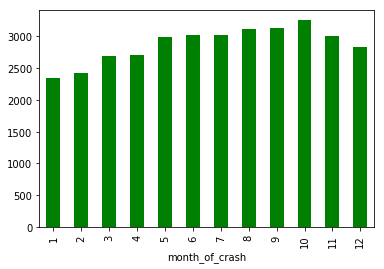

In [4]:
# Monthly data for accidents
fatility_counts = pd.crosstab([Accident_df['month_of_crash']], Accident_df.number_of_fatalities)
fatility_counts.plot(kind='bar', stacked=True, color=['green'], legend=False)

In [5]:
#top 4 month of accidents
Accident_df.groupby(['month_of_crash']).aggregate({'number_of_fatalities':sum}).sort_values('number_of_fatalities',ascending=False).head(4)

number_of_fatalities
month_of_crash                      
10                              3526
8                               3349
9                               3344
6                               3306

In [14]:
# Monthly data for accidents
acci_count=Accident_df.groupby(['month_of_crash']).count().reset_index(drop=True)

acci_count.rename(columns={'Unnamed: 0': 'accident_count'}, inplace=True)
#acci_count
#type(acci_count)
acci_count = acci_count.filter(['accident_count'], axis=1)
acci_count_sorted = acci_count.sort_values('accident_count',ascending=False)
acci_count_sorted.head(4)


accident_count
9            3249
8            3120
7            3106
6            3008

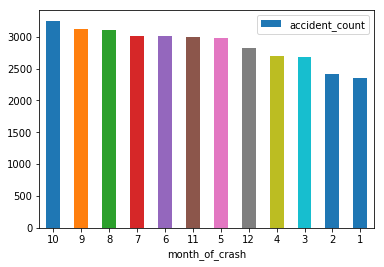

In [7]:
# Monthly data for accidents
acci_count_sorted.plot.bar(x='month_of_crash', y='accident_count', rot=0)

In [16]:
#state wise analysis for fatal accidents:
acci_count_bystate=Accident_df.groupby(['state_name']).count().reset_index()
acci_count_bystate.rename(columns={'Unnamed: 0': 'accident_count_bystate'}, inplace=True)
acci_count_bystate_sorted = acci_count_bystate.sort_values('accident_count_bystate',ascending=False)
acci_count_bystate_sorted = acci_count_bystate_sorted.filter(['accident_count_bystate'], axis=1)
acci_count_bystate_sorted.head(10)

accident_count_bystate
43                    3407
4                     3357
9                     2933
10                    1422
33                    1348
38                    1088
35                    1053
13                    1003
22                     980
42                     966

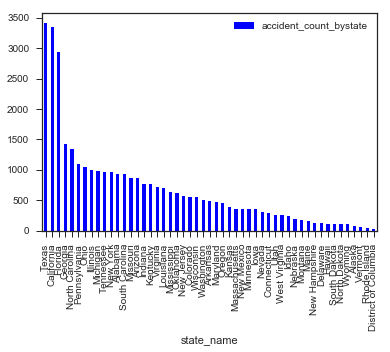

In [83]:
#state wise analysis for fatal accidents:
acci_count_bystate_sorted.plot.bar(x='state_name', y='accident_count_bystate', stacked=True, color=['blue'])

In [17]:
#Hour of accidents
acci_count_bytime=Accident_df.groupby(['hour_of_crash']).count().reset_index()
acci_count_bytime
acci_count_bytime.rename(columns={'Unnamed: 0': 'accident_count_bytime'}, inplace=True)
acci_count_bytime_sorted = acci_count_bytime.sort_values('accident_count_bytime',ascending=False)
acci_count_bytime_sorted = acci_count_bytime_sorted.filter(['accident_count_bytime'], axis=1)
acci_count_bytime_sorted.head(10)

accident_count_bytime
18                   1984
20                   1919
17                   1913
19                   1902
16                   1808
21                   1801
15                   1731
22                   1650
14                   1567
13                   1514

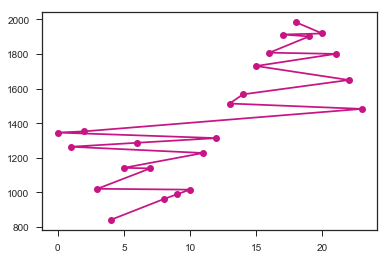

In [85]:
#Hours of accidents
acci_count_bytime_sorted = acci_count_bytime_sorted.loc[acci_count_bytime_sorted['hour_of_crash'] != 99]
plt.plot( 'hour_of_crash', 'accident_count_bytime', data=acci_count_bytime_sorted, marker='o', color='mediumvioletred')
plt.show()


In [18]:
#Location of accident 
acci_count_byloc=Accident_df.groupby(['route_signing_name']).count().reset_index()
acci_count_byloc
acci_count_byloc.rename(columns={'Unnamed: 0': 'accident_count_byloc'}, inplace=True)
acci_count_byloc_sorted = acci_count_byloc.sort_values('accident_count_byloc',ascending=False)
acci_count_byloc_sorted = acci_count_byloc_sorted.filter(['accident_count_byloc'], axis=1)
acci_count_byloc_sorted.head(10)

accident_count_byloc
6                 10234
3                  6104
7                  5490
0                  5160
1                  4295
4                  1541
5                  1138
2                   297
8                   180

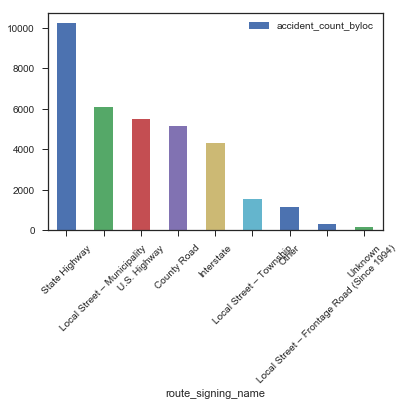

In [87]:
#Location of accident
acci_count_byloc_sorted.plot.bar(x='route_signing_name', y='accident_count_byloc', stacked=True, rot=45)

In [19]:
#Type of Collision which causes fatal accidents
acci_count_bytype=Accident_df.groupby(['manner_of_collision_name']).count().reset_index()
acci_count_bytype
acci_count_bytype.rename(columns={'Unnamed: 0': 'accident_count_bytype'}, inplace=True)
acci_count_bytype_sorted = acci_count_bytype.sort_values('accident_count_bytype',ascending=False)
acci_count_bytype_sorted = acci_count_bytype_sorted.filter(['accident_count_bytype'], axis=1)
acci_count_bytype_sorted.head(10)

accident_count_bytype
3                   21296
0                    6122
1                    3511
2                    2350
9                     519
8                     421
5                      86
10                     77
7                      32
4                      23

In [20]:
#level of light that existed at the time of the crash as indicated in the case material.
acci_count_bylight=Accident_df.groupby(['light_condition_name']).count().reset_index()
acci_count_bylight
acci_count_bylight.rename(columns={'Unnamed: 0': 'accident_count_bylight'}, inplace=True)
acci_count_bylight_sorted = acci_count_bylight.sort_values('accident_count_bylight',ascending=False)
acci_count_bylight_sorted = acci_count_bylight_sorted.filter(['accident_count_bylight'], axis=1)
acci_count_bylight_sorted.head(10)

accident_count_bylight
4                   16336
1                    9494
0                    6732
5                     803
3                     595
2                     262
8                     188
6                      15
7                      14

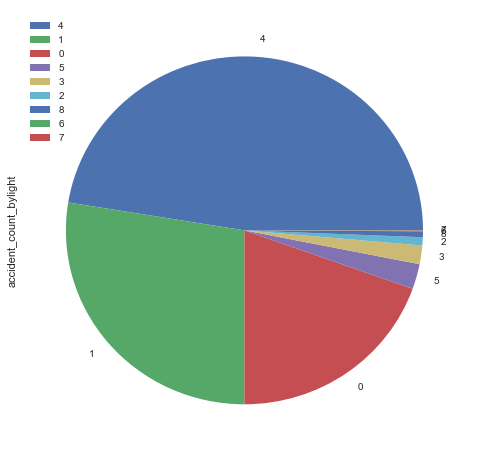

In [90]:
#level of light that existed at the time of the crash as indicated in the case material.
acci_count_bylight=Accident_df.groupby(['light_condition_name']).count().reset_index()
acci_count_bylight
acci_count_bylight.rename(columns={'Unnamed: 0': 'accident_count_bylight'}, inplace=True)
acci_count_bylight_sorted = acci_count_bylight.sort_values('accident_count_bylight',ascending=False)
acci_count_bylight_sorted.head(10)
acci_count_bylight_sorted.plot.pie(y='accident_count_bylight', figsize=(8, 8))

In [21]:
#Weather conditions during accidents
acci_count_byatm=Accident_df.groupby(['atmospheric_conditions_name']).count().reset_index()
acci_count_byatm
acci_count_byatm.rename(columns={'Unnamed: 0': 'accident_count_byatm'}, inplace=True)
acci_count_byatm_sorted = acci_count_byatm.sort_values('accident_count_byatm',ascending=False)
acci_count_byatm_sorted = acci_count_byatm_sorted.filter(['accident_count_byatm'], axis=1)
acci_count_byatm_sorted.head(10)

accident_count_byatm
2                  24620
3                   4961
8                   2148
6                   1634
11                   350
4                    329
12                   183
10                    66
7                     54
9                     48

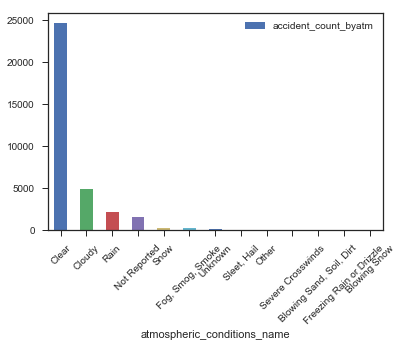

In [92]:
#Weather conditions during accidents
acci_count_byatm_sorted.plot.bar(x='atmospheric_conditions_name', y='accident_count_byatm', stacked=True, rot=45)

## Visualize Attributes

In [ ]:
#simple descriptive statistics for atmospheric conditions 
Accident_df[['number_of_fatalities','atmospheric_conditions_1_name']].groupby('atmospheric_conditions_1_name').describe()

In [ ]:
#simple descriptive statistics for light condition
Accident_df[['number_of_fatalities','light_condition_name']].groupby('light_condition_name').describe()

The correlation heat map is great for finding relationship with many attributes 

In [ ]:
# plot the correlation matrix using seaborn
cmap = seaborn.diverging_palette(200, 1, as_cmap=True) # Assign color for table 
seaborn.set(style="ticks") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(35, 35))

seaborn.hea

tmap(Accident_df.corr(), cmap=cmap, annot=True)

f.tight_layout()

In [ ]:
#Initiate boxplot 
ax = Accident_df.boxplot(column='consecutive_number', by = 'atmospheric_conditions_1_name')
# clean up titles
ax.set_xscale
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')
#
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right');

In [ ]:

#adjust the size of the violin plot
f, ax = plt.subplots(figsize=(30, 30))

seaborn.violinplot(x="atmospheric_conditions_1_name", y="consecutive_number", hue="Day_Time_Yes_No", data=Accident_df, 
               split=True, inner="quart")

## Explore Joint Attributes

Relationship between the number of accidents and the weather conditions. The Attributes are:  

    * atmospheric_conditions_name
    * light_condition_name
    * number_of_fatalities  
    
    Each row or observation is car accident. It provides the conditions in which the accident occured. It captures the number of fatalities, number of people involved in the accident, the time that took the first reponders to get to the area and then to the hospital. This statistics are provided by state, highway it happend.
    One of the relations that can be made is highway vs number of accidents. Does a particular highway presents a higer risk  than than others.

In [11]:
### Crosstab for the athmospheric conditions

AccPerStateAndAtmos=pd.crosstab(Accident_df.state_name,Accident_df.atmospheric_conditions_1_name, margins=False)
AccPerStateAndAtmos

atmospheric_conditions_1_name  Blowing Sand, Soil, Dirt  Blowing Snow  Clear  \
state_name                                                                     
Alabama                                               0             0    705   
Alaska                                                0             0     41   
Arizona                                               2             0    597   
Arkansas                                              0             0    380   
California                                            2             0   2760   
Colorado                                              0             0     46   
Connecticut                                           0             1    238   
Delaware                                              0             0     93   
District of Columbia                                  0             0     22   
Florida                                               1             0   2241   
Georgia                                               0             0   1084   
Hawaii                                                0             0     86   
Idaho                                                 1             1    159   
Illinois                                              0             1    869   
Indiana                                               3             1    515   
Iowa                                                  3             0    248   
Kansas                                                0             0     92   
Kentucky                                              2             0    528   
Louisiana                                             1             0    549   
Maine                                                 0             0    105   
Maryland                                              0             1    336   
Massachusetts                                         0             0    265   
Michigan                                              0             0    610   
Minnesota                                             2             2    209   
Mississippi                                           0             0    488   
Missouri                                              0             0    604   
Montana                                               0             0    105   
Nebraska                                              0             0    145   
Nevada                                                0             0    252   
New Hampshire                                         0             0     86   
New Jersey                                            0             0    485   
New Mexico                                            1             0    316   
New York                                              0             0    617   
North Carolina                                        0             0   1050   
North Dakota                                          0             0     82   
Ohio                                                  1             0    661   
Oklahoma                                              0             0    384   
Oregon                                                0             0    233   
Pennsylvania                                          0             0    949   
Rhode Island                                          0             0     41   
South Carolina                                        0             1    825   
South Dakota                                          0             1     84   
Tennessee                                             0             0    766   
Texas                                                 1             0   2535   
Utah                                                  0             0    180   
Vermont                                               0             0     32   
Virginia                                              0             0      0   
Washington                                            0             0    336   


In [7]:
    # Group Fatalities by State and atmospheric conditions
    AccGroupby= Accident_df.groupby(by=['state_name','atmospheric_conditions_1_name'])
    AccGroupbySum=AccGroupby.number_of_fatalities.sum()
    AccGroupbySum

state_name     atmospheric_conditions_1_name
Alabama        Clear                             782
               Cloudy                            174
               Fog, Smog, Smoke                    7
               Rain                               70
               Snow                                1
               Unknown                             4
Alaska         Clear                              45
               Cloudy                             26
               Rain                                9
               Snow                                2
               Unknown                             2
Arizona        Blowing Sand, Soil, Dirt            2
               Clear                             671
               Cloudy                             77
               Fog, Smog, Smoke                    2
               Not Reported                      171
               Rain                               22
               Sleet, Hail                         3
 

## Explore Attributes and Class

## New Features

In [102]:
#Creates a new column to identify if there was daylight at the time of the accident. Dawn and Dusk were indicated as daylight.
#This effective turns the daylight condition column into a binary field to be used later in the violin graph
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 1 , 'yes', 'no')
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 4 , 'yes', Accident_df['Day_Time_Yes_No'])
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 5 , 'yes', Accident_df['Day_Time_Yes_No'])
#Treats unknown and not reported as null in the data set. This is done because we cannot gain any insight of the lighting condition from these records. 
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 8 , np.nan , Accident_df['Day_Time_Yes_No'])
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 9 , np.nan , Accident_df['Day_Time_Yes_No'])

#count and summary of new light condition field 
Accident_df.groupby(['light_condition','light_condition_name','Day_Time_Yes_No']).size()


light_condition  light_condition_name     Day_Time_Yes_No
1                Daylight                 yes                16336
2                Dark – Not Lighted       no                  9494
3                Dark – Lighted           no                  6732
4                Dawn                     yes                  595
5                Dusk                     yes                  803
6                Dark – Unknown Lighting  no                   262
7                Other                    no                    14
dtype: int64

In [101]:


Accident_df['Fatalities_ratio'] = Accident_df.number_of_fatalities/(Accident_df.number_of_persons_not_in_motor_vehicles_in_transport_mvit + Accident_df.number_of_persons_in_motor_vehicles_in_transport_mvit)

Accident_df.head()

Unnamed: 0  state_number state_name  consecutive_number  \
0           0             4    Arizona               40484   
1           1             4    Arizona               40615   
2           2             4    Arizona               40610   
3           3             4    Arizona               40140   
4           4             4    Arizona               40606   

   number_of_vehicle_forms_submitted_all  \
0                                      1   
1                                      1   
2                                      1   
3                                      1   
4                                      1   

   number_of_motor_vehicles_in_transport_mvit  \
0                                           1   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   number_of_parked_working_vehicles  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   number_of_forms_submitted_for_persons_not_in_motor_vehicles  \
0                                                  0             
1                                                  1             
2                                                  0             
3                                                  0             
4                                                  0             

   number_of_persons_not_in_motor_vehicles_in_transport_mvit  \
0                                                  0           
1                                                  1           
2                                                  0           
3                                                  0           
4                                                  0           

   number_of_persons_in_motor_vehicles_in_transport_mvit        ...         \
0                                                  1            ...          
1                                                  1            ...          
2                                                  3            ...          
3                                                  1            ...          
4                                                  2            ...          

   related_factors_crash_level_2  related_factors_crash_level_2_name  \
0                              0                                None   
1                              0                                None   
2                              0                                None   
3                              0                                None   
4                              0                                None   

   related_factors_crash_level_3  related_factors_crash_level_3_name  \
0                              0                                None   
1                              0                                None   
2                              0                                None   
3                              0                                None   
4                              0                                None   

   number_of_fatalities  number_of_drunk_drivers         timestamp_of_crash  \
0                     1                        0  2016-07-16 14:01:00+00:00   
1                     1                        0  2016-08-28 02:33:00+00:00   
2                     2                        0  2016-08-16 08:50:00+00:00   
3                     1                        1  2016-02-13 00:00:00+00:00   
4                     1                        0  2016-08-09 21:07:00+00:00   

   Day_Time_Yes_No  Fatalities ratio  Fatalities_ratio  
0              yes         43.816085        100.000000  
1               no         43.816085         50.000000  
2              yes         43.816085         66.666667  
3        

## Exceptional Work